# Example reconstruction using Paganin back-propagation

In [1]:
%matplotlib notebook
import numpy as np
from scipy.misc import face
import matplotlib.pyplot as plt
from pynx.wavefront import *
# We import the CPU version of the operators because only this version
# of BackPropagatePaganin implements the generalised method
from pynx.wavefront.cpu_operator import *

## Reconstruction of a rectangular object

In [2]:
# Create a wavefront as a simple transmission through a rectangular object
w = Wavefront(d=np.zeros((1, 512, 512), dtype=np.complex64), pixel_size=1e-6, wavelength=1.5e-10)
a, b = 100e-6 / 2, 200e-6 / 2
x, y = w.get_x_y()
d = ((abs(y) < a) * (abs(x) < b))
delta = 1e-6
beta = 1e-9
thickness = 1.3e-6
mu = 4 * np.pi * beta / w.wavelength
k = 2 * np.pi / w.wavelength
print("       mu * t = %f\nk * delta * t = %f" % (mu * thickness, k * delta * thickness))
w.set(np.exp(1j * k * (-delta + 1j * beta) * thickness * d).reshape((1,512,512)))

       mu * t = 0.000109
k * delta * t = 0.054454


## Initial amplitude

<IPython.core.display.Javascript object>


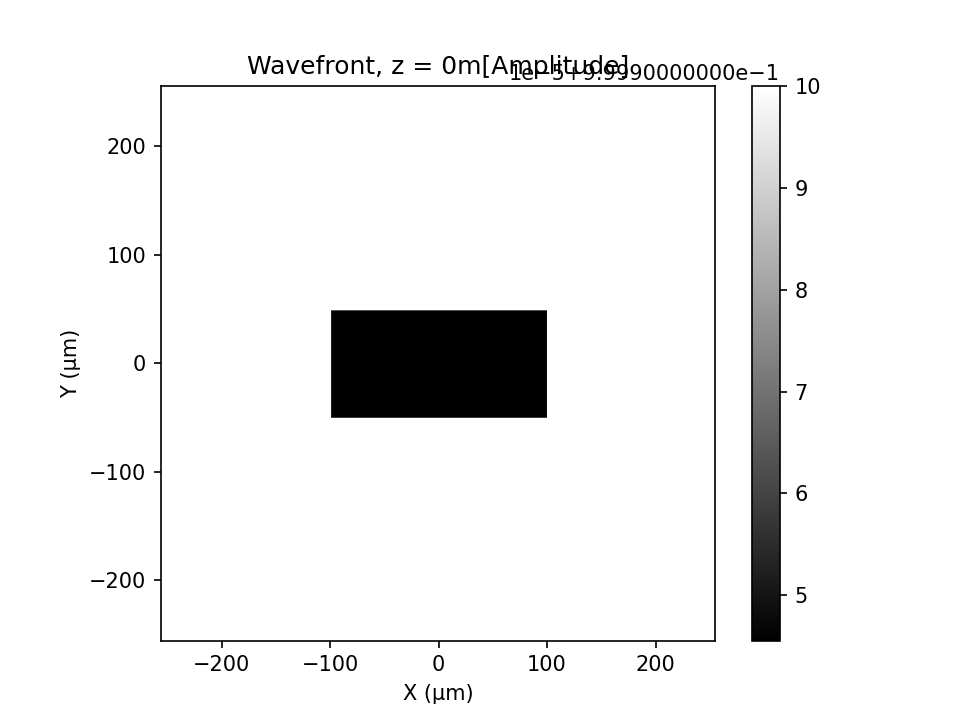

In [3]:
w = ImshowAbs(fig_num=1) * w

## Amplitude after propagation

<IPython.core.display.Javascript object>


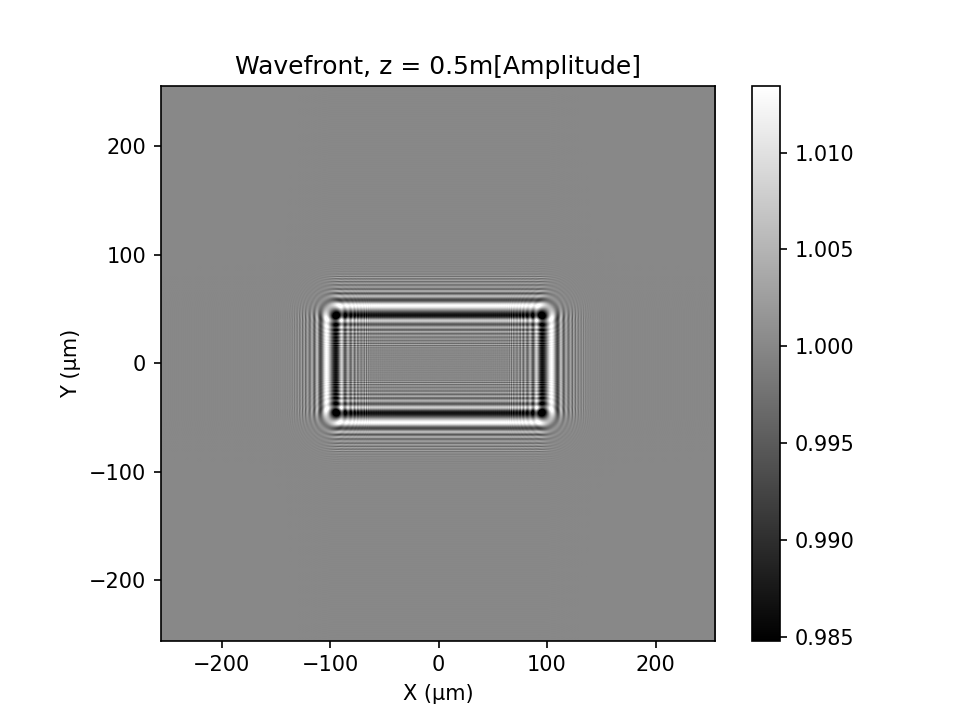

In [4]:
w = ImshowAbs(fig_num=2) * PropagateNearField(0.5) * w

## Reconstruct wavefront using Paganin's equation
This only uses the propagated intensity, the phase is discarded

<IPython.core.display.Javascript object>


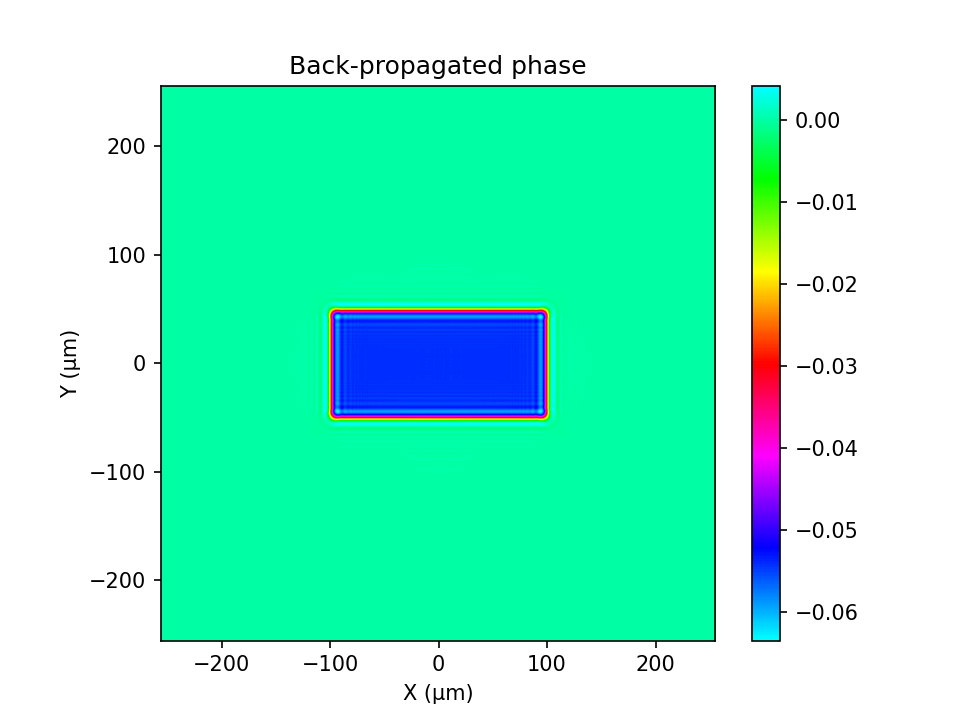

<IPython.core.display.Javascript object>


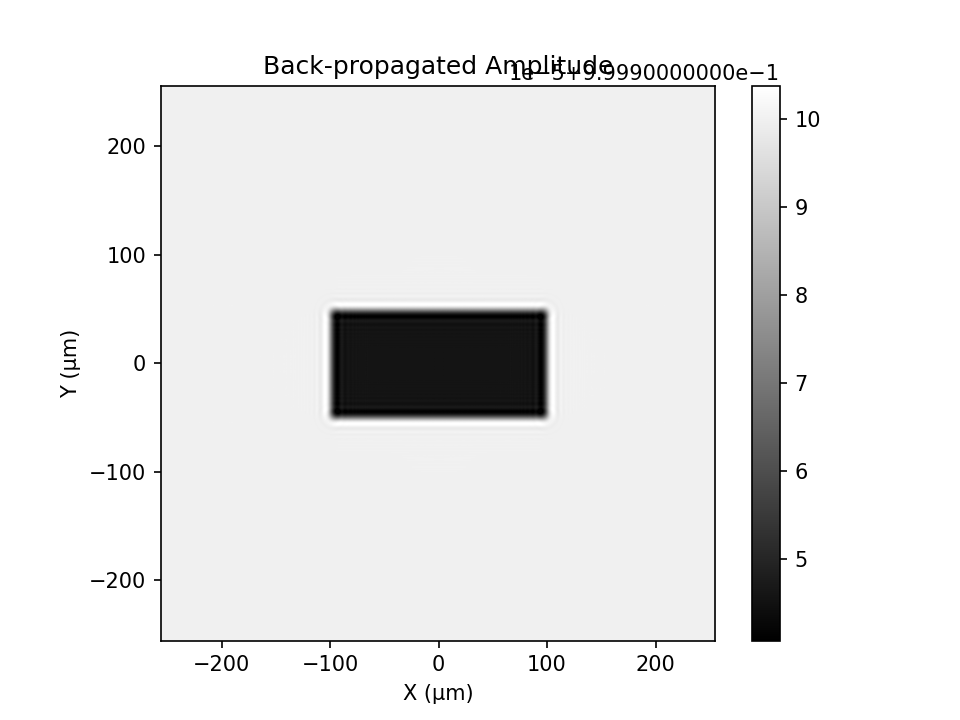

In [5]:
w = ImshowAngle(fig_num=3, title='Back-propagated phase') * BackPropagatePaganin(dz=0.5, generalized_method=True, rebin_factor=1) * w
w = ImshowAbs(fig_num=4, title='Back-propagated Amplitude') * w

### Manually display the calculated thickness (in microns) from the reconstructed phase

<IPython.core.display.Javascript object>


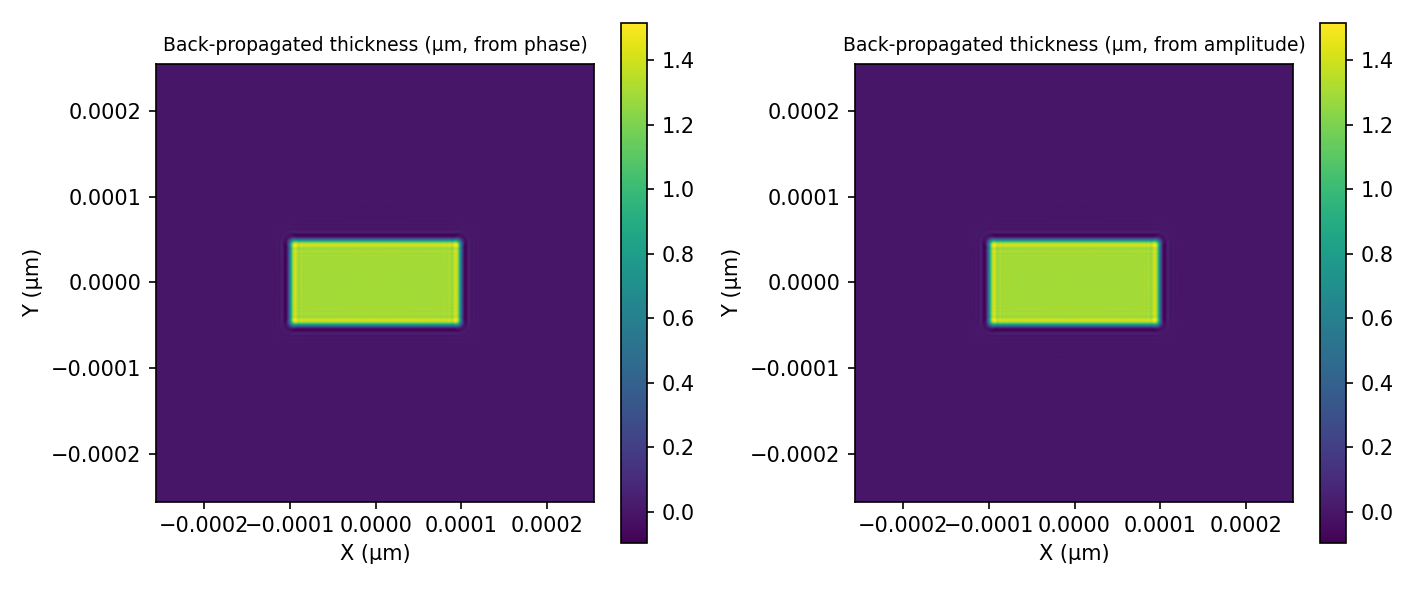

In [6]:
plt.figure(5, figsize=(9.5,4))
plt.subplot(121)
plt.imshow(np.fft.fftshift(-np.angle(w.get()[0])/(k*delta))*1e6, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower')
plt.title("Back-propagated thickness (µm, from phase)", fontsize=9)
plt.xlabel(u'X (µm)')
plt.ylabel(u'Y (µm)')
plt.colorbar()

plt.subplot(122)
plt.imshow(np.fft.fftshift(w.paganin_thickness[0])*1e6, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower')
plt.title("Back-propagated thickness (µm, from amplitude)", fontsize=9)
plt.xlabel(u'X (µm)')
plt.ylabel(u'Y (µm)')
plt.colorbar()

plt.tight_layout()

## Test with a more complicated image

       mu * t = 0.000008
k * delta * t = 0.004189


<IPython.core.display.Javascript object>


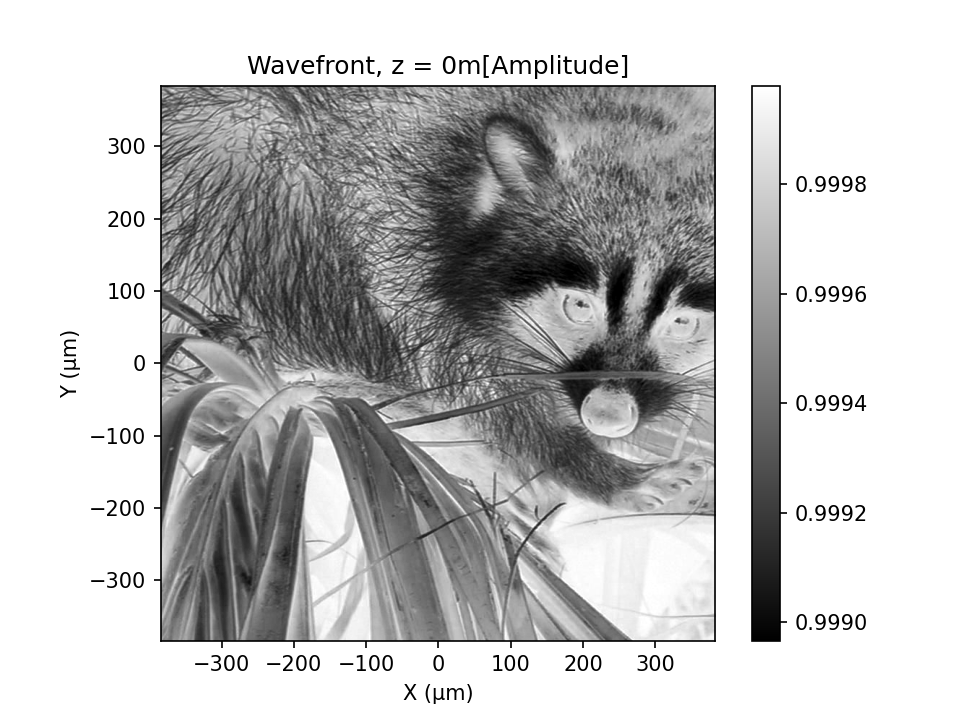

In [7]:
d0 = face()[:,:768,0]
wavelength= 1.5e-10
delta = 1e-6
beta = 1e-9
thickness = 1e-7  # base thickness, to be multiplied by image value 0..255. 
pixel_size = 1e-6
mu = 4 * np.pi * beta / wavelength
k = 2 * np.pi / wavelength
print("       mu * t = %f\nk * delta * t = %f" % (mu * thickness, k * delta * thickness))
d0 = np.exp(k * (-1j * delta - beta) * thickness * d0)

w = Wavefront(d=np.fft.fftshift(d0), pixel_size=pixel_size, wavelength=wavelength)
w = ImshowAbs() * w

### Propagated image

<IPython.core.display.Javascript object>


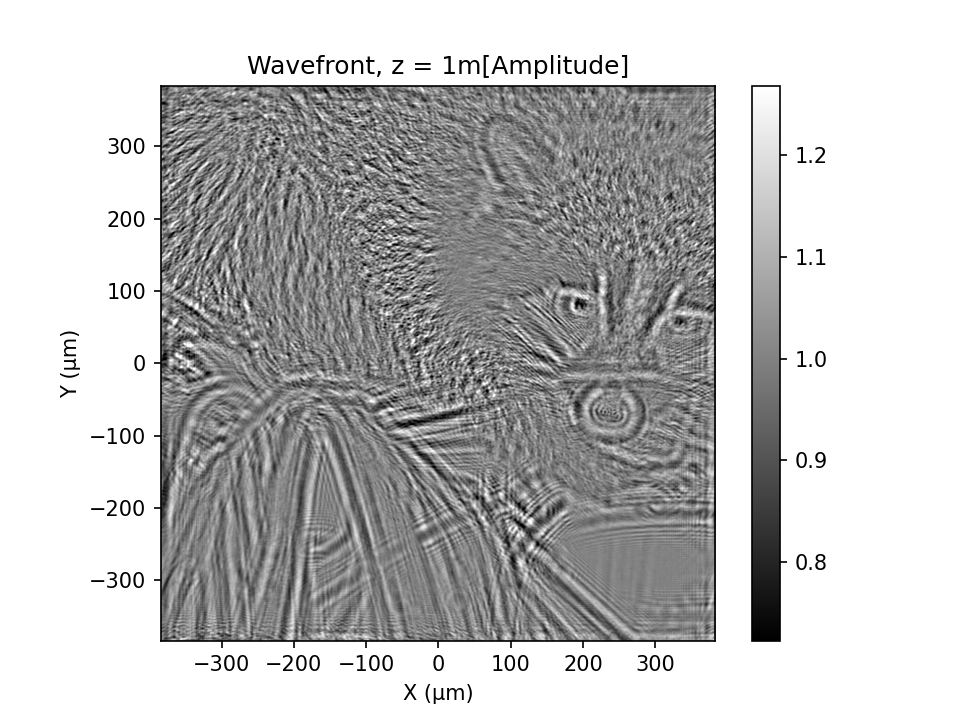

In [8]:
dz = 1
w = ImshowAbs() * PropagateNearField(dz=dz) * w

### Reconstructed image with Paganin operator

<IPython.core.display.Javascript object>


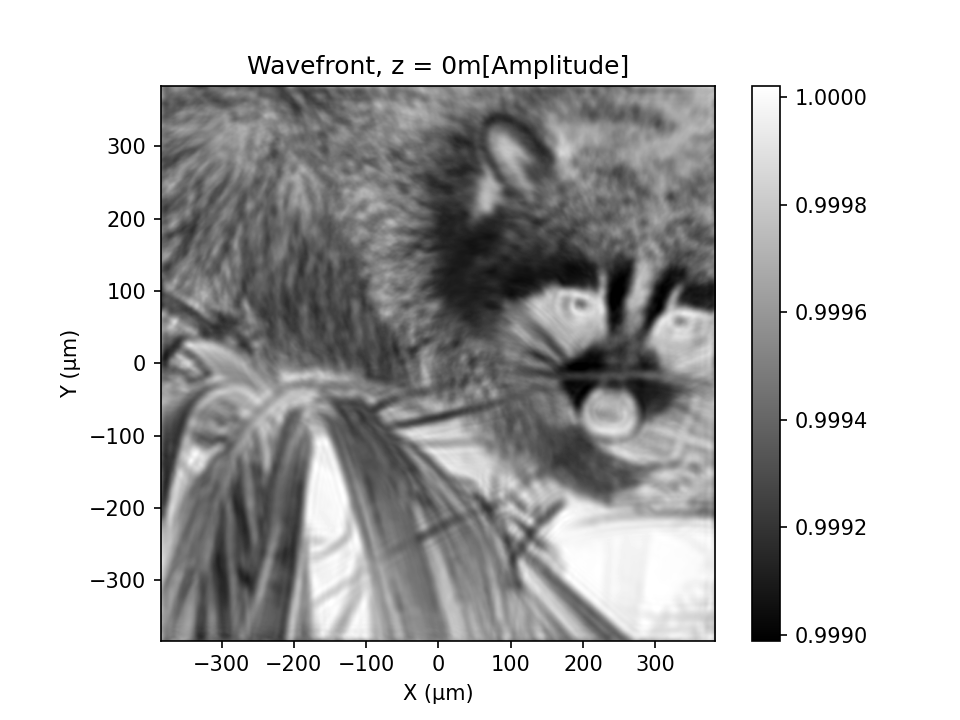

In [9]:
w = ImshowAbs() * BackPropagatePaganin(dz=dz, delta=delta, beta=beta) * w 